### This book condenses scipts into functions

In [313]:
from sodapy import Socrata
import pandas as pd
import numpy as np
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("wqdh-9gek",order="request_date DESC", limit=100000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [314]:
results_df

,address,request_date,completion_date,number_of_potholes_filled_on_block,latitude,longitude,location
0,510 W 98TH ST,2020-03-20T14:02:01.000,2020-03-20T14:14:17.000,48,41.716134091,-87.63632324,"{'type': 'Point', 'coordinates': [-87.63632324..."
1,410 W 98TH ST,2020-03-20T14:01:47.000,2020-03-20T14:10:32.000,39,41.716160247,-87.634337522,"{'type': 'Point', 'coordinates': [-87.63433752..."
2,9600 S GREEN ST,2020-03-20T14:01:31.000,2020-03-20T14:14:56.000,19,41.719189069,-87.644654129,"{'type': 'Point', 'coordinates': [-87.64465412..."
3,9600 S PEORIA ST,2020-03-20T14:01:18.000,2020-03-20T14:15:37.000,20,41.719157328,-87.645884289,"{'type': 'Point', 'coordinates': [-87.64588428..."
4,7100 N HARLEM AVE,2020-03-20T11:44:07.000,2020-03-20T11:46:00.000,7,42.009883566,-87.807283413,"{'type': 'Point', 'coordinates': [-87.80728341..."
...,...,...,...,...,...,...,...
60884,7946 S KEDZIE Avenue,2018-03-08T15:29:10.000,2019-02-07T11:41:59.000,22,41.748382487,-87.70264148,"{'type': 'Point', 'coordinates': [-87.70264148..."
60885,2300 W NORTH AVE,2018-02-25T10:43:49.000,2018-07-02T08:44:33.000,20,NaN,NaN,NaN
60886,2413 N SB OUTER LAKE SHORE DR,2018-02-22T19:37:49.000,2018-08-16T07:27:14.000,1,NaN,NaN,NaN
60887,330 W GOETHE Street,2018-01-31T13:11:12.000,2018-12-26T12:40:18.000,2,41.905862218,-87.637595491,"{'type': 'Point', 'coordinates': [-87.63759549..."


In [286]:
CSV_PATH = "/home/zhimin90/CPT/CSVs/"

In [287]:
#URL = 'https://data.cityofchicago.org/resource/wqdh-9gek.csv'
#test_df = pd.read_csv(URL)
#test_df = pd.read_csv(CSV_PATH+"Potholes_Patched.csv")
test_df = results_df

In [288]:
test_df.columns = pd.Series(test_df.columns).apply(lambda x: x.upper()).values

In [289]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [290]:
test_df = test_df[test_df.LATITUDE.notna()].sort_values(['REQUEST_DATE','COMPLETION_DATE'], ascending=[0,0])
test_df['REQUEST_DATE'] = pd.to_datetime(test_df['REQUEST_DATE'])
test_df['COMPLETION_DATE'] = pd.to_datetime(test_df['COMPLETION_DATE'])
test_df['LATITUDE'] = pd.to_numeric(test_df['LATITUDE'])
test_df['LONGITUDE'] = pd.to_numeric(test_df['LONGITUDE'])

df = test_df
df.columns

Index(['ADDRESS', 'REQUEST_DATE', 'COMPLETION_DATE',
       'NUMBER_OF_POTHOLES_FILLED_ON_BLOCK', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

In [291]:
print(max(test_df['REQUEST_DATE']))
print(min(test_df['REQUEST_DATE']))

2020-03-20 14:02:01
2018-01-31 13:11:12


In [292]:
df['LONGITUDE'].notna().index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            60873, 60874, 60875, 60876, 60877, 60878, 60879, 60881, 60884,
            60887],
           dtype='int64', length=52642)

In [293]:
df[df['LONGITUDE'].notna()]['LONGITUDE'].iloc[0]>xbound[1]

False

In [294]:
df

,ADDRESS,REQUEST_DATE,COMPLETION_DATE,NUMBER_OF_POTHOLES_FILLED_ON_BLOCK,LATITUDE,LONGITUDE,LOCATION
0,510 W 98TH ST,2020-03-20 14:02:01,2020-03-20 14:14:17,48,41.716134,-87.636323,"{'type': 'Point', 'coordinates': [-87.63632324..."
1,410 W 98TH ST,2020-03-20 14:01:47,2020-03-20 14:10:32,39,41.716160,-87.634338,"{'type': 'Point', 'coordinates': [-87.63433752..."
2,9600 S GREEN ST,2020-03-20 14:01:31,2020-03-20 14:14:56,19,41.719189,-87.644654,"{'type': 'Point', 'coordinates': [-87.64465412..."
3,9600 S PEORIA ST,2020-03-20 14:01:18,2020-03-20 14:15:37,20,41.719157,-87.645884,"{'type': 'Point', 'coordinates': [-87.64588428..."
4,7100 N HARLEM AVE,2020-03-20 11:44:07,2020-03-20 11:46:00,7,42.009884,-87.807283,"{'type': 'Point', 'coordinates': [-87.80728341..."
...,...,...,...,...,...,...,...
60878,332 W GOETHE Street,2018-03-21 11:08:10,2018-12-26 12:34:30,4,41.905860,-87.637693,"{'type': 'Point', 'coordinates': [-87.63769262..."
60879,1200 N CLYBOURN Avenue,2018-03-21 10:51:58,2018-12-26 12:33:14,7,41.903844,-87.639735,"{'type': 'Point', 'coordinates': [-87.63973456..."
60881,3000 S PULASKI Road,2018-03-20 12:53:40,2019-01-07 15:14:46,1,41.838615,-87.724608,"{'type': 'Point', 'coordinates': [-87.72460779..."
60884,7946 S KEDZIE Avenue,2018-03-08 15:29:10,2019-02-07 11:41:59,22,41.748382,-87.702641,"{'type': 'Point', 'coordinates': [-87.70264148..."


In [295]:
map_arr = []
interval_int = 30 #use 30 days data to predict next 7 days
series_range = 7 #days
time_interval = timedelta(days=interval_int)
date_start = min(df['REQUEST_DATE'])
date_end = max(df['REQUEST_DATE'])

geo_price_map = df[['REQUEST_DATE', 'COMPLETION_DATE','LATITUDE', 'LONGITUDE']]

In [296]:
date_start

Timestamp('2018-01-31 13:11:12')

In [297]:
date_end

Timestamp('2020-03-20 14:02:01')

In [298]:
(date_end - date_start).days

779

In [299]:
filter1a = pd.to_numeric(geo_price_map["LONGITUDE"]) > xbound[0]
filter1b = pd.to_numeric(geo_price_map["LONGITUDE"]) < xbound[1]
filter1c = pd.to_numeric(geo_price_map["LATITUDE"]) > ybound[0]
filter1d = pd.to_numeric(geo_price_map["LATITUDE"]) < ybound[1]
print("sum of remaining is: " + str(sum(filter1a&filter1b&filter1c&filter1d)))
geo_price_map = geo_price_map[filter1a&filter1b&filter1c&filter1d]

sum of remaining is: 52640


In [300]:
for int_cur_date in range(0, (date_end - date_start).days - interval_int, int(series_range)):
#for int_start_date in range(365, 565, interval_int):
    print(int_start_date)
    geo_price_map_filtered = geo_price_map[geo_price_map['LONGITUDE'].notnull()]
    
    #filter2 = geo_price_map_filtered['REQUEST_DATE'] > (date_start + timedelta(days=int_start_date))
    #filter3 = geo_price_map_filtered['REQUEST_DATE'] <= (date_start + timedelta(days=int_start_date+interval_int))
    
    filter2 = geo_price_map_filtered['REQUEST_DATE'] > (date_end - timedelta(days=int_cur_date+interval_int))
    filter3 = geo_price_map_filtered['REQUEST_DATE'] <= (date_end -  timedelta(days=int_cur_date))
    
    print(date_end - timedelta(days=int_cur_date+interval_int))
    print(date_end -  timedelta(days=int_cur_date))
    
    
    geo_price_map_filtered = geo_price_map_filtered.where(filter2 & filter3)
    print("pothole count: " + str(len(geo_price_map_filtered.notnull().index)))
    print("_"*20)
    map_arr.append(geo_price_map_filtered)

742
2020-02-19 14:02:01
2020-03-20 14:02:01
pothole count: 52640
____________________
742
2020-02-12 14:02:01
2020-03-13 14:02:01
pothole count: 52640
____________________
742
2020-02-05 14:02:01
2020-03-06 14:02:01
pothole count: 52640
____________________
742
2020-01-29 14:02:01
2020-02-28 14:02:01
pothole count: 52640
____________________
742
2020-01-22 14:02:01
2020-02-21 14:02:01
pothole count: 52640
____________________
742
2020-01-15 14:02:01
2020-02-14 14:02:01
pothole count: 52640
____________________
742
2020-01-08 14:02:01
2020-02-07 14:02:01
pothole count: 52640
____________________
742
2020-01-01 14:02:01
2020-01-31 14:02:01
pothole count: 52640
____________________
742
2019-12-25 14:02:01
2020-01-24 14:02:01
pothole count: 52640
____________________
742
2019-12-18 14:02:01
2020-01-17 14:02:01
pothole count: 52640
____________________
742
2019-12-11 14:02:01
2020-01-10 14:02:01
pothole count: 52640
____________________
742
2019-12-04 14:02:01
2020-01-03 14:02:01
pothole co

pothole count: 52640
____________________
742
2018-04-18 14:02:01
2018-05-18 14:02:01
pothole count: 52640
____________________
742
2018-04-11 14:02:01
2018-05-11 14:02:01
pothole count: 52640
____________________
742
2018-04-04 14:02:01
2018-05-04 14:02:01
pothole count: 52640
____________________
742
2018-03-28 14:02:01
2018-04-27 14:02:01
pothole count: 52640
____________________
742
2018-03-21 14:02:01
2018-04-20 14:02:01
pothole count: 52640
____________________
742
2018-03-14 14:02:01
2018-04-13 14:02:01
pothole count: 52640
____________________
742
2018-03-07 14:02:01
2018-04-06 14:02:01
pothole count: 52640
____________________
742
2018-02-28 14:02:01
2018-03-30 14:02:01
pothole count: 52640
____________________
742
2018-02-21 14:02:01
2018-03-23 14:02:01
pothole count: 52640
____________________
742
2018-02-14 14:02:01
2018-03-16 14:02:01
pothole count: 52640
____________________
742
2018-02-07 14:02:01
2018-03-09 14:02:01
pothole count: 52640
____________________


In [301]:
map_arr.reverse()

In [302]:
map_arr[-1][map_arr[-1]['REQUEST_DATE'].notnull()]

,REQUEST_DATE,COMPLETION_DATE,LATITUDE,LONGITUDE
0,2020-03-20 14:02:01,2020-03-20 14:14:17,41.716134,-87.636323
1,2020-03-20 14:01:47,2020-03-20 14:10:32,41.716160,-87.634338
2,2020-03-20 14:01:31,2020-03-20 14:14:56,41.719189,-87.644654
3,2020-03-20 14:01:18,2020-03-20 14:15:37,41.719157,-87.645884
4,2020-03-20 11:44:07,2020-03-20 11:46:00,42.009884,-87.807283
...,...,...,...,...
3634,2020-02-19 14:09:13,2020-03-10 12:33:33,41.937543,-87.729645
3635,2020-02-19 14:08:46,2020-02-19 14:10:00,41.834331,-87.642979
3636,2020-02-19 14:08:42,2020-02-19 14:23:13,41.723913,-87.551076
3638,2020-02-19 14:08:21,2020-02-24 15:03:29,41.936199,-87.732889


In [303]:
import dill
f = open(CSV_PATH + 'map_arr_2020.pkl', "wb")
dill.dump(map_arr, file=f)
f.close()

#f_in = open(CSV_PATH + "map_arr_2018-2019.pkl","rb")
#map_arr = dill.load(f_in)
#f_in.close()

In [304]:
sum(map_arr[4]['REQUEST_DATE'].notnull())

11

In [305]:
min(map_arr[20]['REQUEST_DATE'][map_arr[20]['REQUEST_DATE'].notnull()])

Timestamp('2018-06-27 14:47:43')

In [306]:
map_arr[50][map_arr[50].notnull()]

,REQUEST_DATE,COMPLETION_DATE,LATITUDE,LONGITUDE
0,NaT,NaT,NaN,NaN
1,NaT,NaT,NaN,NaN
2,NaT,NaT,NaN,NaN
3,NaT,NaT,NaN,NaN
4,NaT,NaT,NaN,NaN
...,...,...,...,...
60878,NaT,NaT,NaN,NaN
60879,NaT,NaT,NaN,NaN
60881,NaT,NaT,NaN,NaN
60884,NaT,NaT,NaN,NaN


In [307]:
pothole_count = []
for df in map_arr:
    pothole_count.append(df.count())
    if sum(df['REQUEST_DATE'].notnull())>0:
        print(min(df['REQUEST_DATE'][df['REQUEST_DATE'].notnull()]))
    print(df.count())
print(len(pothole_count))

2018-03-08 15:29:10
REQUEST_DATE       1
COMPLETION_DATE    1
LATITUDE           1
LONGITUDE          1
dtype: int64
2018-03-08 15:29:10
REQUEST_DATE       1
COMPLETION_DATE    1
LATITUDE           1
LONGITUDE          1
dtype: int64
2018-03-08 15:29:10
REQUEST_DATE       5
COMPLETION_DATE    5
LATITUDE           5
LONGITUDE          5
dtype: int64
2018-03-08 15:29:10
REQUEST_DATE       9
COMPLETION_DATE    9
LATITUDE           9
LONGITUDE          9
dtype: int64
2018-03-08 15:29:10
REQUEST_DATE       11
COMPLETION_DATE    11
LATITUDE           11
LONGITUDE          11
dtype: int64
2018-03-20 12:53:40
REQUEST_DATE       10
COMPLETION_DATE    10
LATITUDE           10
LONGITUDE          10
dtype: int64
2018-03-26 17:49:02
REQUEST_DATE       6
COMPLETION_DATE    6
LATITUDE           6
LONGITUDE          6
dtype: int64
2018-03-30 15:51:25
REQUEST_DATE       5
COMPLETION_DATE    5
LATITUDE           5
LONGITUDE          5
dtype: int64
2018-04-22 08:51:12
REQUEST_DATE       12
COMPLETION_DAT

2019-07-24 14:04:05
REQUEST_DATE       1906
COMPLETION_DATE    1906
LATITUDE           1906
LONGITUDE          1906
dtype: int64
2019-07-31 14:02:08
REQUEST_DATE       1772
COMPLETION_DATE    1772
LATITUDE           1772
LONGITUDE          1772
dtype: int64
2019-08-07 14:03:33
REQUEST_DATE       1765
COMPLETION_DATE    1765
LATITUDE           1765
LONGITUDE          1765
dtype: int64
2019-08-14 14:02:55
REQUEST_DATE       1971
COMPLETION_DATE    1971
LATITUDE           1971
LONGITUDE          1971
dtype: int64
2019-08-21 14:03:05
REQUEST_DATE       1918
COMPLETION_DATE    1918
LATITUDE           1918
LONGITUDE          1918
dtype: int64
2019-08-28 14:04:21
REQUEST_DATE       1863
COMPLETION_DATE    1863
LATITUDE           1863
LONGITUDE          1863
dtype: int64
2019-09-04 14:04:05
REQUEST_DATE       1916
COMPLETION_DATE    1916
LATITUDE           1916
LONGITUDE          1916
dtype: int64
2019-09-11 14:02:02
REQUEST_DATE       1640
COMPLETION_DATE    1640
LATITUDE           1640
LONGI

(-87.85041986215067, -87.52523350043245)
(41.65924455069546, 42.019245840973895)


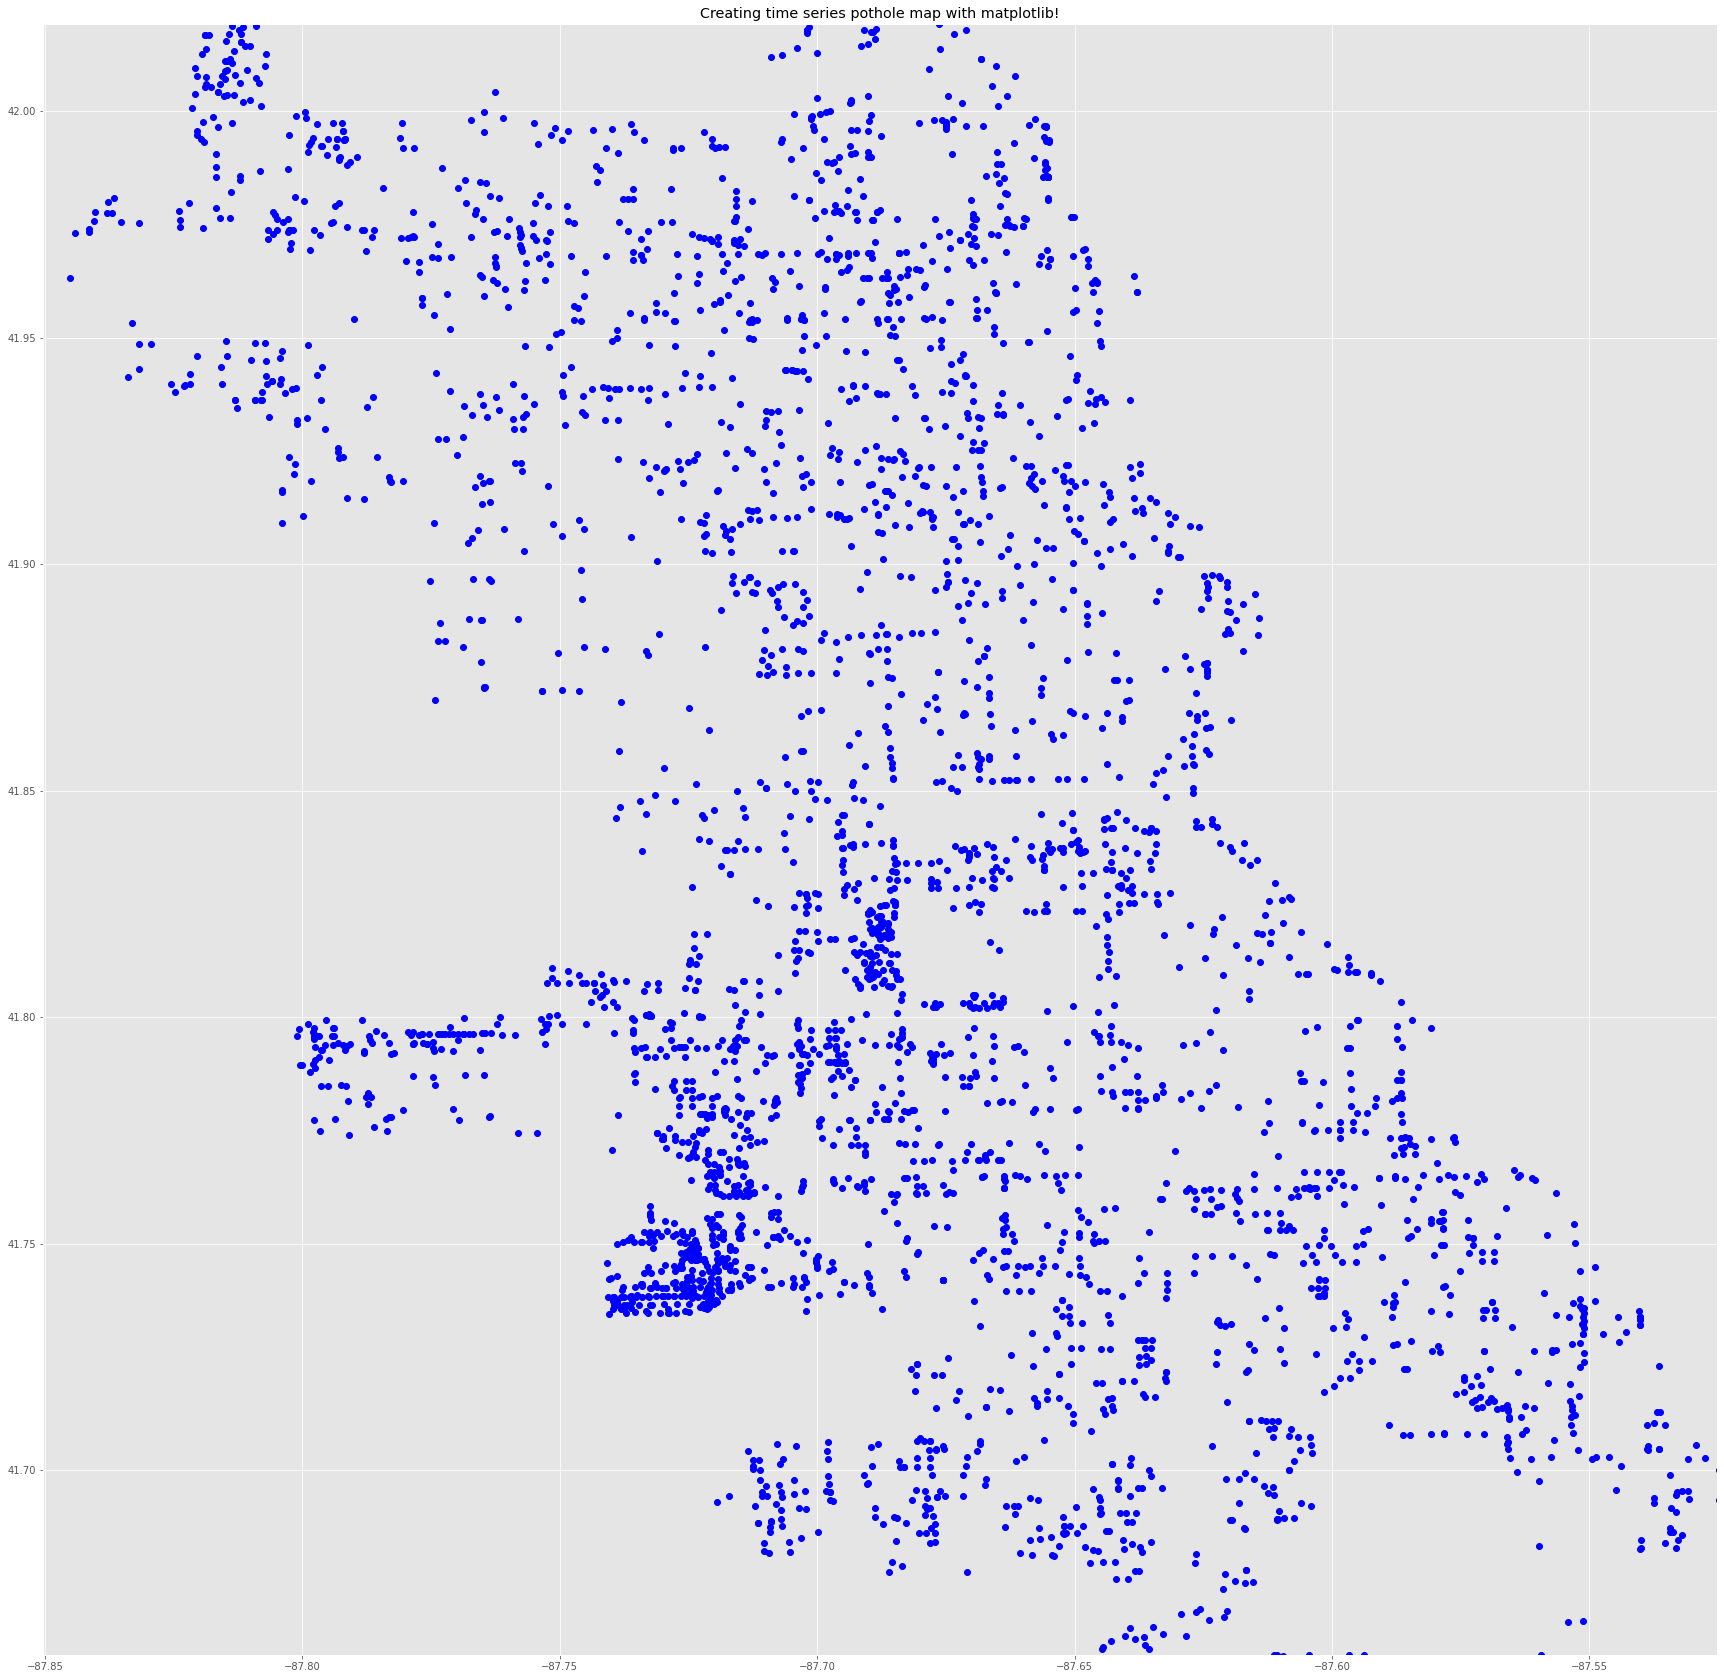

In [308]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams["figure.figsize"] = [30, 30]

df = map_arr[-1]
xdata = df["LONGITUDE"].dropna().to_numpy()
ydata = df["LATITUDE"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))


xlim = (-87.85041986215067, -87.52523350043245)
ylim = (41.65924455069546, 42.019245840973895)

print(xlim)
print(ylim)

fig = plt.figure()
#plt.scatter(xdata,ydata)
ax = plt.axes(xlim=xlim, ylim=ylim) 
#ax.set_facecolor((1.0, 0.47, 0.42))
sct, = plt.plot([], [],'o', color='blue', lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    sct.set_data([], [])
    return sct,

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i):
    df = map_arr[i]
    xdata = df["LONGITUDE"].dropna().to_numpy()
    ydata = df["LATITUDE"].dropna().to_numpy()
    sct.set_data(xdata,ydata)
    return sct,

# setting a title for the plot 
plt.title('Creating time series pothole map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.arange(0,len(pothole_count),1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
anim.save(CSV_PATH + 'potholes_2020.gif', writer='imagemagick') 
#plt.show()

In [309]:
from scipy import stats as st
from scipy.stats import gaussian_kde as gaussian_kde
import numpy as np
from KDEpy import FFTKDE, NaiveKDE


def get_kde( x, y, xmin, xmax, ymin, ymax, xx, yy, positions):

    values = np.array([x, y]).T
    #values = values.reshape(values.shape[1], values.shape[0])
    #print("values is: " + str(values))
    #grid, points = get_kernel(values)
    points = get_kernel(values, positions)
    #kernel.set_bandwidth(bw_method=kernel.factor / 30.)
    f = np.reshape(points, xx.shape)
    #print(points.shape)
    #print(grid)
    #return grid, f
    return f

def get_kernel(data, positions):
    #print(data.shape)
    #print(data)
    estimator = FFTKDE(kernel='gaussian', norm=2, bw=0.001)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    points = estimator.fit(data, weights=None).evaluate(positions)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    #kernel = gaussian_kde(dataset=values, bw_method="silverman" )
    #return grid, points
    return points

In [310]:
grid_size = 1000
density_matrix_t_series = []
# Define the borders
x = [-87.9361,-87.5245]
y = [41.6447,42.023]
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

xx, yy = np.mgrid[xmin:xmax:(grid_size*1j), ymin:ymax:(grid_size*1j)]
positions = np.dstack([xx.ravel(), yy.ravel()])
positions = positions.reshape(positions.shape[1], positions.shape[2])
grid_matrix = positions

In [311]:
for i, df in enumerate(map_arr):
    if df["LONGITUDE"].count() > 400:
        #grid, points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        density_matrix_t_series.append(points)
        print("@" + str(i))
    

@22
@26
@27
@28
@29
@30
@31
@32
@33
@34
@35
@36
@37
@38
@39
@40
@41
@42
@43
@44
@45
@46
@47
@48
@49
@50
@51
@52
@53
@54
@55
@56
@57
@58
@59
@60
@61
@62
@63
@64
@65
@66
@67
@68
@69
@70
@71
@72
@73
@74
@75
@76
@77
@78
@79
@80
@81
@82
@83
@84
@85
@86
@87
@88
@89
@90
@91
@92
@93
@94
@95
@96
@97
@98
@99
@100
@101
@102
@103
@104
@105
@106


In [312]:
f = open(CSV_PATH +'density_matrix_t_series_2020.pkl', "wb")
dill.dump(density_matrix_t_series, file=f)
f.close()

f = open(CSV_PATH + 'grid_matrix_2020.pkl', "wb")
dill.dump(grid_matrix, file=f)
f.close()